In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("C://Users/Jatin/Desktop/Lp3prac/ML/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [40]:
# Remove unwanted columns
df=df.drop(['Unnamed: 0','key'],axis=1)

In [41]:
df.shape

(200000, 7)

In [42]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [43]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [44]:
# Filling missing values
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(),inplace=True)

In [45]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<AxesSubplot:>

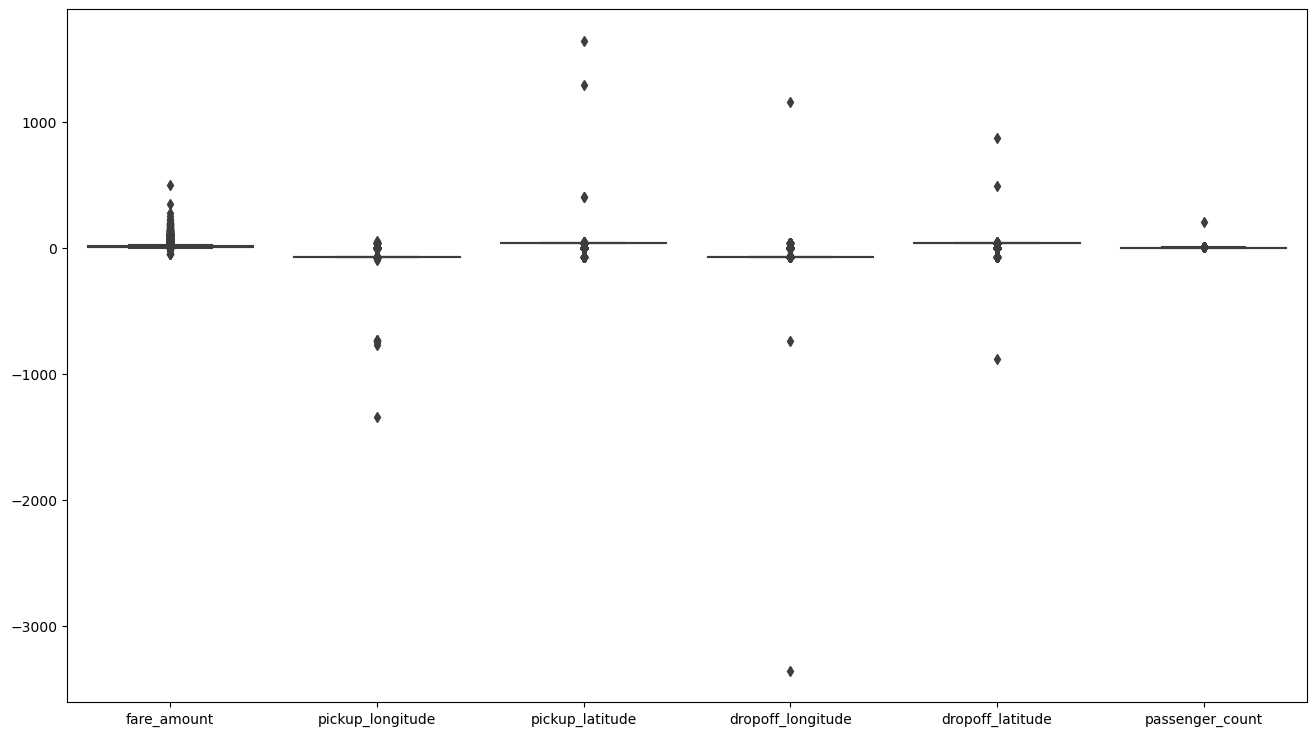

In [46]:
#Identifying outliers
plt.figure(figsize=(16,9))
sns.boxplot(data=df)

In [47]:
#Correlation
corr=df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


In [48]:
## Split the data
x=df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
y=df['fare_amount']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [49]:
#LinearRegression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)
y_pred=regression.predict(x_test)
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df)

        Actual  Predicted
54020      5.0  11.322083
109078    10.5  11.322535
101379     8.1  11.321839
31068      6.5  11.322393
190635    17.0  11.322201
...        ...        ...
151999    12.9  11.322169
71063     10.9  11.322181
152349    13.3  11.322148
78883      6.5  11.322259
177911    14.9  11.322030

[60000 rows x 2 columns]


In [50]:
from sklearn.metrics import r2_score, mean_squared_error
print("Linear Regression:")
print("R-squared:", r2_score(y_test, y_pred))
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", np.sqrt(MSE))

Linear Regression:
R-squared: 8.945509214886016e-05
Mean Squared Error: 105.26726336278071
Root Mean Squared Error: 10.259983594664307


In [51]:
#Random Forest classifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(result_df)

        Actual  Predicted
54020      5.0      7.109
109078    10.5     12.950
101379     8.1      8.637
31068      6.5      6.342
190635    17.0     15.743
...        ...        ...
151999    12.9     14.654
71063     10.9     11.280
152349    13.3     14.973
78883      6.5      5.871
177911    14.9     10.122

[60000 rows x 2 columns]


In [52]:
print("\nRandom Forest Regressor:")
print("R-squared:", r2_score(y_test, pred))
mser = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mser)
print("Root Mean Squared Error:", np.sqrt(mser))


Random Forest Regressor:
R-squared: 0.718268619302688
Mean Squared Error: 29.659744664615857
Root Mean Squared Error: 5.446076079583892
